In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
boston_dataset = load_boston()
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

prices = data['PRICE']
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.33, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
print('Intercepr', regr.intercept_)
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

Training data 0.7424908331488688
Test data r-squared:  0.7165219393967545
Intercepr 34.21329725760626
              coef
CRIM     -0.156354
ZN        0.066062
INDUS    -0.020166
CHAS      1.578898
NOX     -15.349078
RM        3.341055
AGE       0.011477
DIS      -1.553607
RAD       0.305450
TAX      -0.012158
PTRATIO  -0.814406
B         0.013276
LSTAT    -0.545290


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64


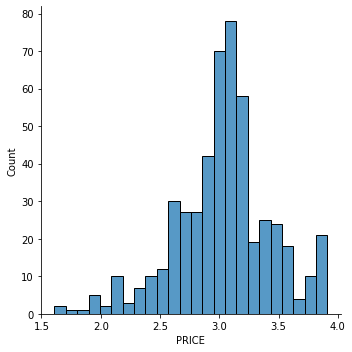

Training data 0.7796352061275136
Test data r-squared:  0.7929627248168828
Intercepr 3.9596922048693517
             coef
CRIM    -0.012408
ZN       0.001706
INDUS    0.001449
CHAS     0.077808
NOX     -0.643669
RM       0.079957
AGE      0.000560
DIS     -0.049597
RAD      0.014822
TAX     -0.000644
PTRATIO -0.034194
B        0.000593
LSTAT   -0.030100


In [ ]:
y_log = np.log(data['PRICE'])
print(y_log.tail())

sns.displot(y_log)
plt.show()

prices = np.log(data['PRICE'])
feautures = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.33, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
print('Intercepr', regr.intercept_)
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))

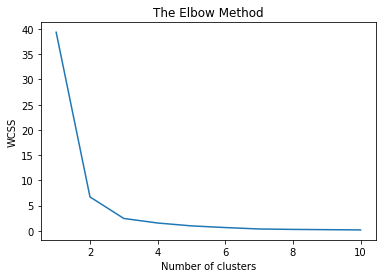

In [ ]:
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
X = dataset.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

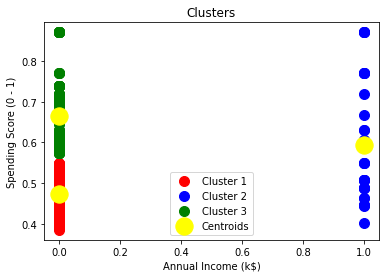

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.ylabel('Spending Score (0 - 1)')
plt.legend()
plt.show()

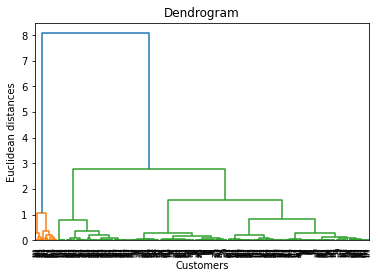

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

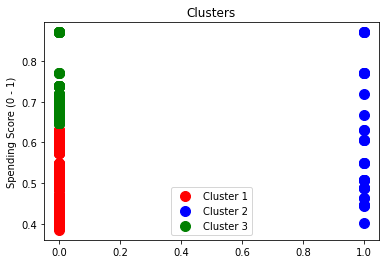

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters')
plt.ylabel('Spending Score (0 - 1)')
plt.legend()
plt.show()